## Predicting the percentage of student based on the number of study hours using Linear Regression
### Author : S.Jatin

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
link="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data=pd.read_csv(link)
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [38]:
data.shape

(25, 2)

## Visualization using matplotlib

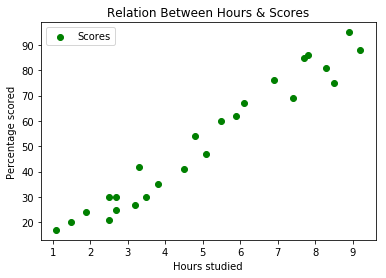

In [12]:
plt.scatter(data.Hours,data.Scores,c='g')
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.title('Relation Between Hours & Scores')
plt.legend()

From the above scatter plot it is clear that hours studied by a student are directly proportional to the marks scored 

Text(0.5, 1.0, 'Score Ranges')

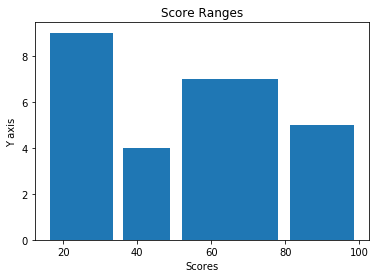

In [13]:
plt.hist(data.Scores, bins=[15,35,50,80,100], rwidth=0.86)
plt.xlabel('Scores')
plt.ylabel('Y axis')
plt.title('Score Ranges')

From the above histogram we can say that there are many students who scored more than 50%, but there are many more students with very low percentange between 15% to 35% and there are few people who scored above 35% and below 50%

## Preparing the data for training

In [18]:
x=data.drop(columns='Scores')
y=data.drop(columns='Hours')

In [19]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

## Training the data using Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Plotting the regressor line on scatter plot

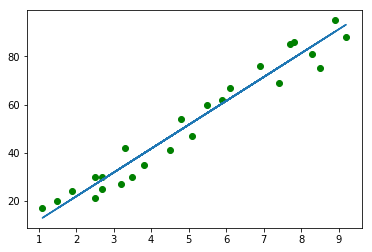

In [25]:
line = regressor.coef_*x+regressor.intercept_
# Plotting for the test data
plt.scatter(x, y, c='g')
plt.plot(x, line);
plt.show()

## Predicting the scores using model

In [28]:
regressor.predict([[2.5]])

array([[26.79480124]])

## Predicting the score of a student who studied for 9.25 hours

In [29]:
regressor.predict([[9.25]])

array([[93.69173249]])

## Comparing Actual Vs Predicted

In [36]:
y_predicted=regressor.predict(X_test)
y_predicted

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [45]:
y_test

,Scores
5,20
2,27
19,69
16,30
11,62


## Accuracy & Mean absolute Error of the model

In [46]:
regressor.score(X_test,y_test)

0.9454906892105356

In [48]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predicted))

Mean Absolute Error: 4.183859899002975


## By this we can conclude that our model is giving 94.5% accuacy with mea absolute error of 4.18
# Thank You